In [9]:
import json
import pandas as pd
import requests

# from google.colab import drive
# drive.mount('/content/drive')
# f = open('/content/drive/My Drive/kiselev_result.json', 'r', encoding='utf-8')

# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  


# Этап 0: подгружаем нужные файлы
Здесь мы создаем датафреймы на базе .json файлов историй чатов (ниже я приведу предварительную оценку сообществ)

Файлы большие - поэтому загружать будем из бакета в Yandex Object Storage

In [10]:
url1 = 'https://storage.yandexcloud.net/opendata-kiselev/python_no1.json'
url2 = 'https://storage.yandexcloud.net/opendata-kiselev/python_no2.json'
url3 = 'https://storage.yandexcloud.net/opendata-kiselev/python_no3.json'

**1. Боталка(Студенты) – Поступашки:** канал для студентов технической (преимущественно IT) специальности, нацеленных на программы стажировок в крупных компаниях. Преимущественно – через участие в открытых 'соревнованиях', открывающихся в рамках сезонов стажировок

In [18]:
r = requests.get(url1, allow_redirects=True)
with open('kiselev_messages_1.json', 'wb') as f: f.write(r.content)
with open('kiselev_messages_1.json', 'r', encoding='utf-8') as f: data = json.load(f)
f.close()
df1 = pd.DataFrame(data['messages'])
df1['channel_name'] = 'Поступашки'

**2. Тренировки по алгоритмам в Яндексе // чат для общения:** целевая аудитория аналогичная; задача студентов – попасть на стажировку в Яндексе или другой Финтех компании. Тренировки по алгоритмам для участников сообщества – способ подтянуть свои навыки и лучше подготовиться к интервью с работодателем. В чате часто обсуждаются вопросы стажировок, но упор – скорее на решение задач в рамках практикума.

In [12]:
r = requests.get(url2, allow_redirects=True)
with open('kiselev_messages_2.json', 'wb') as f: f.write(r.content)
with open('kiselev_messages_2.json', 'r', encoding='utf-8') as f: data = json.load(f)
f.close()
df2 = pd.DataFrame(data['messages'])
df2['channel_name'] = 'Яндекс алгоритмы'

**3. Python чат | Питон помощь:** целевая аудитория аналогичная; задача студентов аналогичная, однако с еще большим упором на обучение. В чате проходят анонсы вебинаров и обсуждение задач. Стоит уточнить, что предварительно в этом чате флуда больше, чем в остальных в выборке

In [13]:
r = requests.get(url3, allow_redirects=True)
with open('kiselev_messages_3.json', 'wb') as f: f.write(r.content)
with open('kiselev_messages_3.json', 'r', encoding='utf-8') as f: data = json.load(f)
f.close()
df3 = pd.DataFrame(data['messages'])
df3['channel_name'] = 'Питон помощь'

# Этап 1: создаем единый датафрейм
Работа, проделанная на первом этапе – достаточно точно копирует мою работу из ДЗ2 (мне кажется, я сделал достаточно хороший инструмент, и теперь хочу им еще раз воспользоваться). 

Непосредственно анализ данных в рамках итогового проекта начинается на Этапе 2. Решил не разделять на две тетрадки, потому что так будет удобнее работать

**Здесь я создаю датафреймы с нужной мне информацией.**
Создание разбито на два этапа, поскольку я решил последовать за вашим подходом в google colab - и проанализировать только сообщения

In [14]:
df = pd.concat([df1, df2, df3], axis=0)
df = df.reset_index(drop=True)
# df.info()

In [15]:
tg_df = df[['id','date','type','actor','from','from_id','text','edited','channel_name','reactions']]
message_df = tg_df[tg_df['type'] == 'message']
message_df

,id,date,type,actor,from,from_id,text,edited,channel_name,reactions
68,90,2022-10-20T15:53:54,message,NaN,Duvoleros Sotzercer,user1192101408,"[Есть такая задача , {'type': 'link', 'text': ...",2022-10-20T15:55:21,Поступашки,NaN
69,105,2022-10-20T16:09:55,message,NaN,Владислав,user619229681,Чекните на канале How to заботать продакт анал...,NaN,Поступашки,NaN
70,106,2022-10-20T16:09:55,message,NaN,Владислав,user619229681,Всем привет!\nПодскажите пж как оптимизировать...,NaN,Поступашки,NaN
118,171,2022-10-20T19:15:19,message,NaN,Владислав,user619229681,"[{'type': 'hashtag', 'text': '#Задача_дня'}, \...",NaN,Поступашки,NaN
175,229,2022-10-20T22:13:06,message,NaN,адиконн,user989894891,всем привет,NaN,Поступашки,NaN
...,...,...,...,...,...,...,...,...,...,...
466090,150042,2025-03-19T22:22:12,message,NaN,Nikolay Bokov,user377160817,"Не бита, не крашена",NaN,Питон помощь,NaN
466091,150043,2025-03-19T22:22:23,message,NaN,ИON,user6725236493,,NaN,Питон помощь,NaN
466092,150047,2025-03-19T22:24:26,message,NaN,Main. Dlzxn,user1007130027,Главное что живой🙂,NaN,Питон помощь,NaN
466093,150049,2025-03-19T23:21:10,message,NaN,kirill,user614315543,"привет всем, можете подкинуть годный ютуб курс...",NaN,Питон помощь,NaN


Здесь я создаю функцию для преобразования сообщений со "сложным" форматом отображения в .json файле.

**Задача функции** – обеспечить: 1. единообразный тип сообщения - str, и 2. читаемость "сложных" str сообщений в IDE 

Если впоследствии в датасете попадаются сообщения длиной выше порогового ограничения телеграма, 4096 символов, это вероятнее всего – результат работы этой функции

In [16]:
def list_to_str(x: list) -> str:
    '''
    эта функция нужна для преобразования тех сообщений, которые в .json телеграм разбивает на блоки.
    задача - сделать эти сообщения читаемыми в .txt формате
    по сути - то же, что делали вы, только (как мне показалось) универсальнее
    '''

# Инициализируем переменные и проверим входящий тип данных:
    if type(x) != list: raise TypeError('эта функция работает только с типом данных list')
    message = []
    default_message_types = ['link','bold','phone','cashtag','italic','hashtag','custom_emoji','mention','email','strikethrough','underline','bot_command','bank_card']
    specific_message_types = ['spoiler', 'code', 'mention_name','pre','blockquote']
    list_len = len(x)

# Пройдемся по всем блокам "сложного сообщения":
    for i in range(list_len):

        message_part = x[i]
        typeerror_text = f'обработка данного блока сообщения не предусмотрена функцией. \nБлок сообщения: {message_part}'
    # Проанализируем блоки сообщений в зависимости от их типа:
    # Ошибки поднимутся, если функцией не предусмотрена обработка блоков конкретного типа/устройства
        if type(message_part) == dict: 
            if message_part['type'] == 'text_link': message.append(f"{message_part['text']}: {message_part['href']}")
            elif message_part['type'] in specific_message_types: message.append(f"__{message_part['type']}: {message_part['text']} – end of {message_part['type']}__")
            elif message_part['type'] in default_message_types: message.append(message_part['text'])
            else: raise TypeError(typeerror_text)
        elif type(message_part) == str: message.append(message_part)
        else: raise TypeError(typeerror_text)
    
    return ''.join(message)


# message_df[message_df['text'].apply(lambda x: type(x) == list)]

Далее пройдемся по всем "сложным сообщениям", и преобразуем их в обычный вид:

(я не пытался оптимизировать функцию, поэтому обработка 460к записей займет примерно 3 минуты)
Простите за ожидание :(

In [17]:

for i in message_df[message_df['text'].apply(lambda x: type(x) == list)].index:
    # print(list_to_str(message_df.loc[i,'text']))
    message_df.loc[i,'text'] = list_to_str(message_df.loc[i,'text'])
    # print(message_df.loc[i,'text'])

Аналогично создадим функцию, которая будет анализировать количество реакций:

In [8]:
# message_df[message_df['reactions'].notna()]['reactions'].apply(lambda x: len(x)).value_counts()

def reactions_count(x: list) -> list:
    
    if not x: return x

    list_len = len(x)
    reactions_list = []

    for i in range(list_len):
        reaction = x[i]

        if reaction['type'] == 'emoji': 
            reactions_list += ([reaction['emoji']]*reaction['count'])

        elif reaction['type'] == 'custom_emoji':
            reactions_list += ([reaction['document_id']]*reaction['count'])

        elif reaction['type'] == 'paid':
            reactions_list += (f"telegram_paid_star * {reaction['count']}")

        else: raise TypeError(f"функция не поддерживает такой тип реакции. Реакция: {reaction}")

    return reactions_list


# Примеры входной переменной:
a = [{'type': 'emoji',
  'count': 1,
  'emoji': '🔥',
  'recent': [{'from': 'Артем',
    'from_id': 'user816875731',
    'date': '2022-03-18T23:58:31'}]}]

b = {'type': 'custom_emoji', 'count': 3, 'document_id': 'stickers/AnimatedSticker (46).tgs', 'recent': 
     [{'from': 'Артем', 'from_id': 'user816875731', 'date': '2024-07-21T12:25:27'}, 
      {'from': '🐋💨', 'from_id': 'user780264903', 'date': '2024-07-21T12:24:57'}, 
      {'from': None, 'from_id': 'user450499722', 'date': '2024-07-21T12:23:47'}]}

c = {'type': 'paid', 'count': 1}

# message_df[message_df['reactions'].notna()]['reactions'].head(20).apply(lambda x: x[0].get('emoji') if x else x)

# message_df['reactions'].apply(lambda x: x.get('emoji') if x.notna() else x)

Создадим новые столбцы: количество реакций и список с ними:

In [9]:
message_df['reactions_list'] = message_df[message_df['reactions'].notna()]['reactions'].apply(reactions_count)
message_df['reactions_number'] = message_df[message_df['reactions'].notna()]['reactions_list'].apply(len).apply(int)
message_df.sort_values(by='reactions_number',ascending=False)

# message_df[message_df['from_id'] == 'channel1031397600'].sort_values(by='reactions_number')

,id,date,type,actor,from,from_id,text,edited,channel_name,reactions,reactions_list,reactions_number
437753,119458,2025-02-19T20:11:10,message,NaN,Python чат | Питон помощь,channel2390931683,Набираем 256 реакций на этом посте и я сделаю ...,2025-02-19T20:11:18,Питон помощь,"[{'type': 'emoji', 'count': 179, 'emoji': '👍',...","[👍, 👍, 👍, 👍, 👍, 👍, 👍, 👍, 👍, 👍, 👍, 👍, 👍, 👍, 👍, ...",286.0
246000,201500,2024-02-09T18:28:31,message,NaN,Екатерина Балдина,user417639153,"Друзья, спустя 3 года существования чата мы на...",2024-02-09T18:28:44,Яндекс алгоритмы,"[{'type': 'emoji', 'count': 74, 'emoji': '👍', ...","[👍, 👍, 👍, 👍, 👍, 👍, 👍, 👍, 👍, 👍, 👍, 👍, 👍, 👍, 👍, ...",143.0
246008,201508,2024-02-09T18:29:16,message,NaN,Екатерина Балдина,user417639153,"прикиньте, да?\nтеперь так\n\nмы долго спорили...",2024-02-09T18:29:22,Яндекс алгоритмы,"[{'type': 'custom_emoji', 'count': 69, 'docume...","[stickers/sticker (128).webp, stickers/sticker...",131.0
264467,222722,2024-03-07T09:14:23,message,NaN,Julia Karavaeva,user336332623,ВСЯ ВАЖНАЯ ИНФОРМАЦИЯ О ТРЕНИРОВКАХ 5.0:\n\n👉 ...,2024-03-29T11:39:29,Яндекс алгоритмы,"[{'type': 'custom_emoji', 'count': 72, 'docume...","[video_files/sticker (189).webm, video_files/s...",116.0
250861,207829,2024-03-01T12:34:33,message,NaN,Julia Karavaeva,user336332623,Чат — это возможность для вас обмениваться зна...,2024-03-01T12:35:30,Яндекс алгоритмы,"[{'type': 'custom_emoji', 'count': 61, 'docume...","[stickers/sticker (150).webp, stickers/sticker...",110.0
...,...,...,...,...,...,...,...,...,...,...,...,...
466090,150042,2025-03-19T22:22:12,message,NaN,Nikolay Bokov,user377160817,"Не бита, не крашена",NaN,Питон помощь,NaN,NaN,NaN
466091,150043,2025-03-19T22:22:23,message,NaN,ИON,user6725236493,,NaN,Питон помощь,NaN,NaN,NaN
466092,150047,2025-03-19T22:24:26,message,NaN,Main. Dlzxn,user1007130027,Главное что живой🙂,NaN,Питон помощь,NaN,NaN,NaN
466093,150049,2025-03-19T23:21:10,message,NaN,kirill,user614315543,"привет всем, можете подкинуть годный ютуб курс...",NaN,Питон помощь,NaN,NaN,NaN


Наш датасет готов!

In [11]:
message_df
# message_df.to_csv('tg_messages.csv', index=False, encoding='utf-8') # все равно больше 100 МБ

,id,date,type,actor,from,from_id,text,edited,channel_name,reactions,reactions_list,reactions_number
68,90,2022-10-20T15:53:54,message,NaN,Duvoleros Sotzercer,user1192101408,Есть такая задача https://www.eolymp.com/ru/pr...,2022-10-20T15:55:21,Поступашки,NaN,NaN,NaN
69,105,2022-10-20T16:09:55,message,NaN,Владислав,user619229681,Чекните на канале How to заботать продакт анал...,NaN,Поступашки,NaN,NaN,NaN
70,106,2022-10-20T16:09:55,message,NaN,Владислав,user619229681,Всем привет!\nПодскажите пж как оптимизировать...,NaN,Поступашки,NaN,NaN,NaN
118,171,2022-10-20T19:15:19,message,NaN,Владислав,user619229681,#Задача_дня\n\nВ честь сегодняшнего поста How ...,NaN,Поступашки,NaN,NaN,NaN
175,229,2022-10-20T22:13:06,message,NaN,адиконн,user989894891,всем привет,NaN,Поступашки,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
466090,150042,2025-03-19T22:22:12,message,NaN,Nikolay Bokov,user377160817,"Не бита, не крашена",NaN,Питон помощь,NaN,NaN,NaN
466091,150043,2025-03-19T22:22:23,message,NaN,ИON,user6725236493,,NaN,Питон помощь,NaN,NaN,NaN
466092,150047,2025-03-19T22:24:26,message,NaN,Main. Dlzxn,user1007130027,Главное что живой🙂,NaN,Питон помощь,NaN,NaN,NaN
466093,150049,2025-03-19T23:21:10,message,NaN,kirill,user614315543,"привет всем, можете подкинуть годный ютуб курс...",NaN,Питон помощь,NaN,NaN,NaN


# Этап 2: exploratory data analysis

**1. Проведем анализ среднего, медианы и моды длины сообщений**

In [77]:
message_df['text_len'].agg(['mean','median','max'])

mean        61.33757
median      35.00000
max       6333.00000
Name: text_len, dtype: float64

**2. Создадим сводную таблицу по анализу среднего количества реакций и средней длины сообщений.** Дополнительно сравним бощее количество сообщений

In [64]:
message_df.groupby('channel_name')[['text_len','reactions_number']].agg(['count','mean'])

text_len            reactions_number          
                    count       mean            count      mean
channel_name                                                   
Питон помощь       131767  37.026221            16584  1.388748
Поступашки          65707  72.670690                0       NaN
Яндекс алгоритмы   266302  70.570578            34304  2.131559

**3. Определим количество редактированных сообщений**

In [72]:
df_volume = message_df.shape[0]

message_df.groupby('channel_name')['edited'].agg(count = 'count', df_proportion = lambda x: x.count()/df_volume)

,count,df_proportion
channel_name,,
Питон помощь,20626,0.044474
Поступашки,6533,0.014087
Яндекс алгоритмы,56626,0.122098


**4. Определим юзера, написавшего самое большое количество сообщений**

In [45]:
message_df.groupby('from_id')['channel_name'].agg(['count','nunique']).sort_values(by='count',ascending=False).head(20)

,count,nunique
from_id,,
user285995237,39377,1
user467688891,11147,1
user630279390,11098,1
user450588708,9130,1
user5480371702,8843,1
user785620382,8456,1
user2030874686,5199,1
user5114427430,3347,1
user1007130027,3344,1


Видим, что большая часть пользователей с самым высоким уровнем активности проявляет активность только в одном из трех сообществ

Проанализируем, как распределяются между сообществами самые активные пользователи и определим статистическую значимость пользователя для нашего датафрейма:


In [ ]:
from collections import Counter

def popular_from_list(x):
    if not isinstance(x, list): 
        return x 
    if not x: 
        return None 
    # return Counter(x).most_common(2)[0][0] # этот вариант покажет только наиболее предпочтительное юзером сообщество
    return Counter(x).most_common(2)

message_df.groupby('from_id')['channel_name'].agg(count = 'count', df_proportion = lambda x: x.count()/df_volume, channel_name = lambda x: popular_from_list(list(x))).sort_values(by='count', ascending=False).head(20)

,count,df_proportion,channel_name
from_id,,,
user285995237,39377,0.084905,"[(Яндекс алгоритмы, 39377)]"
user467688891,11147,0.024035,"[(Питон помощь, 11147)]"
user630279390,11098,0.023930,"[(Питон помощь, 11098)]"
user450588708,9130,0.019686,"[(Питон помощь, 9130)]"
user5480371702,8843,0.019067,"[(Питон помощь, 8843)]"
user785620382,8456,0.018233,"[(Питон помощь, 8456)]"
user2030874686,5199,0.011210,"[(Питон помощь, 5199)]"
user5114427430,3347,0.007217,"[(Питон помощь, 3347)]"
user1007130027,3344,0.007210,"[(Питон помощь, 3344)]"


Самый первый юзер в списке важен для нас: его сообщения это почти 10% датафрейма.

**5. Проанализируем сообщения от этого пользователя:**

In [82]:
top_user_df = message_df[message_df['from_id'] == 'user285995237']
top_user_df

,id,date,type,actor,from,from_id,text,edited,channel_name,reactions,text_len,reactions_list,reactions_number
73050,9045,2021-07-01T23:14:33,message,NaN,Slava Muravev,user285995237,"я не прочел все, но уже вижу что-то страшное",NaN,Яндекс алгоритмы,NaN,44,NaN,NaN
73051,9046,2021-07-01T23:14:45,message,NaN,Slava Muravev,user285995237,"знаешь, в чем различие между String и StringBu...",NaN,Яндекс алгоритмы,NaN,52,NaN,NaN
73053,9048,2021-07-01T23:15:26,message,NaN,Slava Muravev,user285995237,"не, я не прочел, потому что по первым строкам ...",NaN,Яндекс алгоритмы,NaN,78,NaN,NaN
73055,9050,2021-07-01T23:15:39,message,NaN,Slava Muravev,user285995237,не совсем,NaN,Яндекс алгоритмы,NaN,9,NaN,NaN
73056,9051,2021-07-01T23:15:46,message,NaN,Slava Muravev,user285995237,каждое изменение порождает новую строку,NaN,Яндекс алгоритмы,NaN,39,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331605,293599,2024-12-19T23:11:19,message,NaN,Slava Muravev,user285995237,ну тип это больше вопрос философии и определений,NaN,Яндекс алгоритмы,NaN,48,NaN,NaN
331606,293600,2024-12-19T23:11:34,message,NaN,Slava Muravev,user285995237,я воспринимаю переменную как именнованную ячей...,2024-12-19T23:12:39,Яндекс алгоритмы,"[{'type': 'emoji', 'count': 1, 'emoji': '👍', '...",90,[👍],1.0
331607,293601,2024-12-19T23:11:42,message,NaN,Slava Muravev,user285995237,"а уже внутри она хранит либо значение, либо сс...",NaN,Яндекс алгоритмы,NaN,57,NaN,NaN
331608,293602,2024-12-19T23:11:58,message,NaN,Slava Muravev,user285995237,"кто-то считает переменной только то, что храни...",NaN,Яндекс алгоритмы,NaN,72,NaN,NaN


Предварительно оцениваем, что сообщения осмысленные.

Проверим среднюю длину текста и количество реакций: 

In [83]:
top_user_df[['text_len','reactions_number']].agg(['mean','median','max'])

,text_len,reactions_number
mean,50.623638,1.816176
median,34.000000,1.000000
max,4087.000000,73.000000


Проверим количество уникальных сообщений

In [86]:
top_user_df['text'].nunique()/top_user_df.shape[0]

0.9265561114356097

Анализ показывает, что пользователь вероятнее всего – живой человек, попросту проявивший аномально высокую активность в чате

# Этап 3: графики с визуализацией

Простите, никак не могу соскочить с этой темы   XD

**1. Проанализируем помесячную активность пользователя:**

<Axes: xlabel='year,month'>

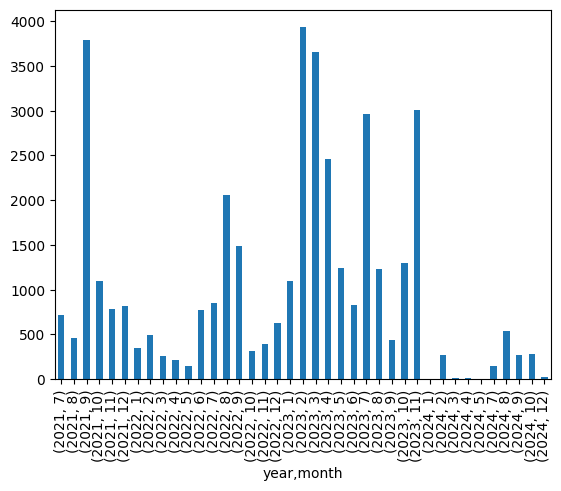

In [126]:
top_user_df['date'] = pd.to_datetime(top_user_df['date'])

top_user_df['year'] = top_user_df['date'].dt.year
top_user_df['month'] = top_user_df['date'].dt.month

# top_user_df.sort_values(by='date',ascending=True)
top_user_df.sort_values(by='date',ascending=True).groupby(['year','month'])['text'].count().plot(kind='bar')

**2. Проанализируем дополнительно соотношение между объемом текста и количеством реакций у нашего "топового пользователя"**

<Axes: xlabel='text_len', ylabel='reactions_number'>

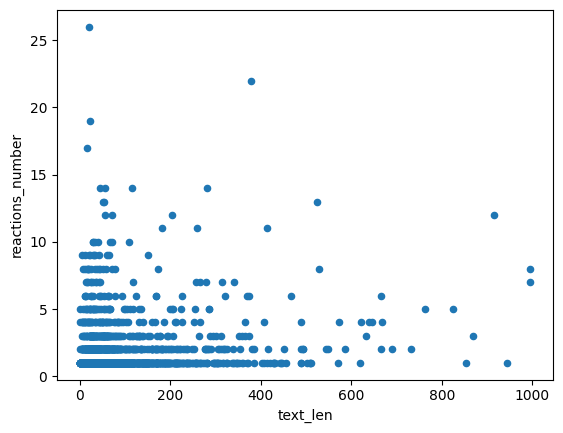

In [123]:
# top_user_df.plot(kind = 'scatter', x='text_len',y='reactions_number') # если хотим увидеть все данные
top_user_df[top_user_df['text_len']<1000].plot(kind = 'scatter', x='text_len',y='reactions_number') # если хотим убрать выбросы

In [124]:
top_user_df[['text_len','reactions_number']].corr()

,text_len,reactions_number
text_len,1.000000,0.388107
reactions_number,0.388107,1.000000


Мне кажется, что я вижу небольшую негативную корреляцию между длиной текста и количеством реакций. Но pandas говорит об обратном 

Сравним распределение со средней информацией по всем пользователям: 

<Axes: xlabel='text_len', ylabel='reactions_number'>

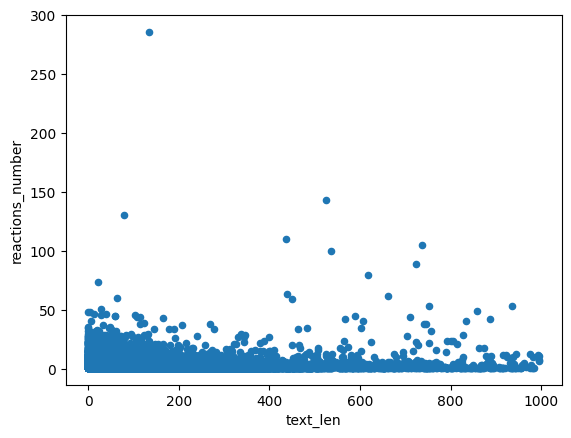

In [174]:
# message_df.plot(kind = 'scatter', x='text_len',y='reactions_number') # если хотим увидеть все данные
message_df[message_df['text_len']<1000].plot(kind = 'scatter', x='text_len',y='reactions_number') # если хотим убрать выбросы

И корреляцию тоже сравним:

In [175]:
message_df[['text_len','reactions_number']].corr()

,text_len,reactions_number
text_len,1.000000,0.143855
reactions_number,0.143855,1.000000


Анализ показывает, что корреляция между длиной сообщения и количеством реакций у нашего пользователя выше, чем у средних пользователей: она хотя бы статистически значима.

Перейдем к анализу всего датафрейма:

**3. Проанализируем общую активность в телеграм чатах:**

<Axes: title={'center': 'Питон помощь'}, xlabel='year,month'>

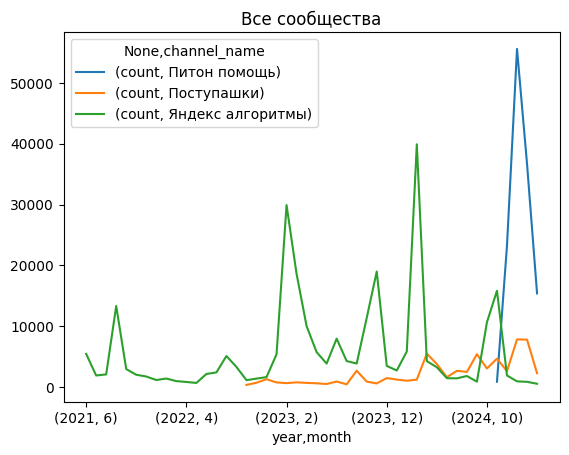

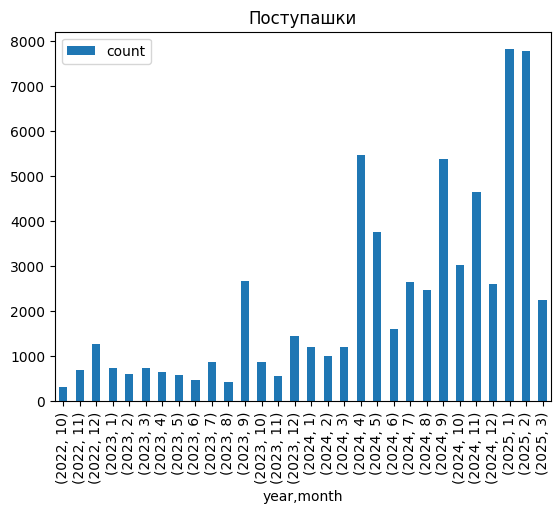

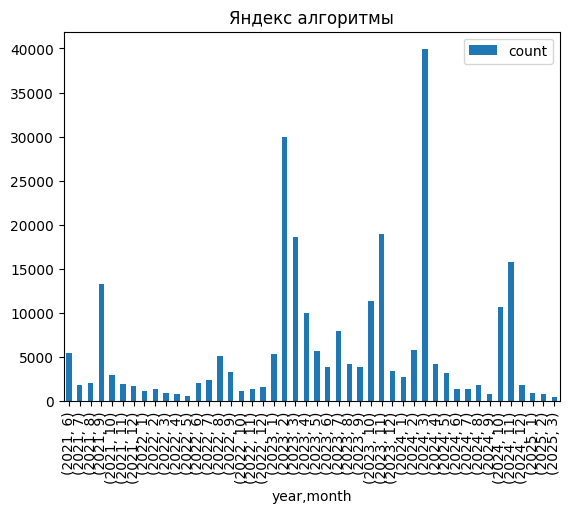

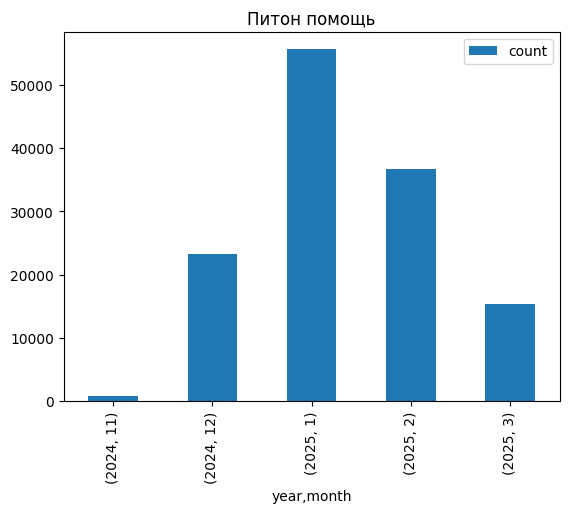

In [179]:
message_df['date'] = pd.to_datetime(message_df['date'])
message_df['year'] = message_df['date'].dt.year
message_df['month'] = message_df['date'].dt.month
message_df['day'] = message_df['date'].dt.day


message_df.groupby(['year','month','channel_name'])['text'].agg(['count']).unstack().plot(kind='line', title='Все сообщества')
message_df[message_df['channel_name'] == 'Поступашки'].groupby(['year','month'])['text'].agg(['count']).plot(kind='bar', title='Поступашки')
message_df[message_df['channel_name'] == 'Яндекс алгоритмы'].groupby(['year','month'])['text'].agg(['count']).plot(kind='bar', title='Яндекс алгоритмы')
message_df[message_df['channel_name'] == 'Питон помощь'].groupby(['year','month'])['text'].agg(['count']).plot(kind='bar', title='Питон помощь')

Результаты анализа показывают, что канал "Питон помощь" – самый молодой(но при этом с подозрительно высокими объемами сообщений), а канал с тренировками по алгоритмам Яндекса – самый старший в выборке.

Пики активности несущественно различаются между сообществами, но приблизительно приходятся на:
1. март-апрель
2. сентябрь
3. рубеж года

Мое предположение: активность связана либо с циклами открытия сезонов стажировок в крупных компаниях, либо с запускам местных курсов с обучением в рамках сообществ. 
(В чате Яндекса мне сказали, что всплеск в марте 2024 связан со стартом 5го сезона тренировок по алгоритмам, а обсуждение в начале 2025го года в Поступашках по контексту частично связано с сезоном стажировок у Яндекса)


**4. Проанализируем месяц с пиковой активностью в канале "Питон помощь" по количеству и средней длине сообщений:**

<Axes: title={'center': 'Питон помощь, 01.2025, количество сообщений'}, xlabel='day'>

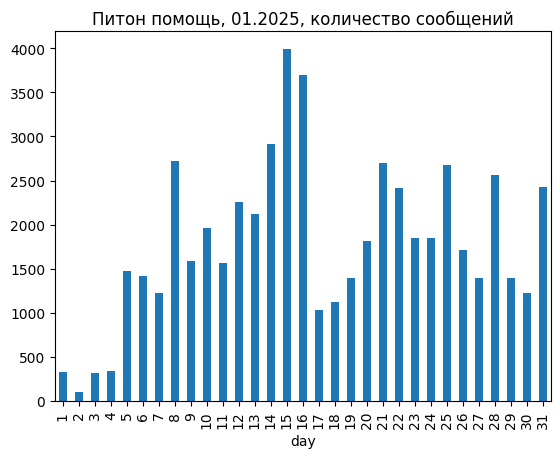

In [158]:
message_df[(message_df['channel_name'] == 'Питон помощь') & (message_df['year'] == 2025) & (message_df['month'] == 1)].groupby('day')['text'].count().plot(kind='bar', title='Питон помощь, 01.2025, количество сообщений')

<Axes: title={'center': 'Питон помощь, 01.2025, средняя длина сообщения'}, xlabel='day'>

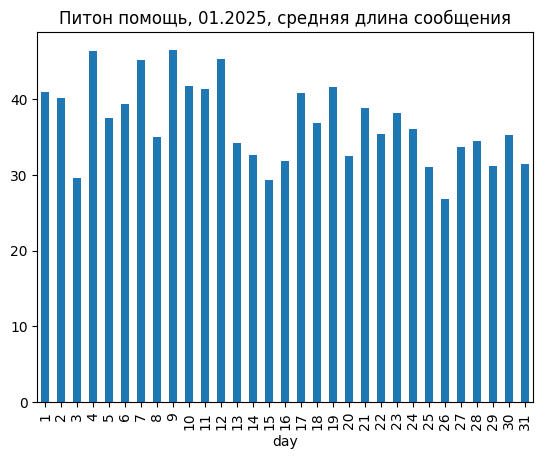

In [159]:

message_df[(message_df['channel_name'] == 'Питон помощь') & (message_df['year'] == 2025) & (message_df['month'] == 1)].groupby('day')['text_len'].mean().plot(kind='bar', title='Питон помощь, 01.2025, средняя длина сообщения')

Проведенный анализ отсылает нас на сводную таблицу 2.2: согласно информации оттуда, средняя длина сообщения в данном сообществе в ~2 раза меньше, чем у других в выборке. Это, а также смысловой анализ сообщений, наводит на мысль, что по сути это скорее флудилка, чем нишевый канал с обсуждением важных или профильных вопросов.

**5. Визуализируем объемы телеграм сообществ в выборке:**

<Axes: title={'center': 'Количество сообщений в cообществах'}, ylabel='count'>

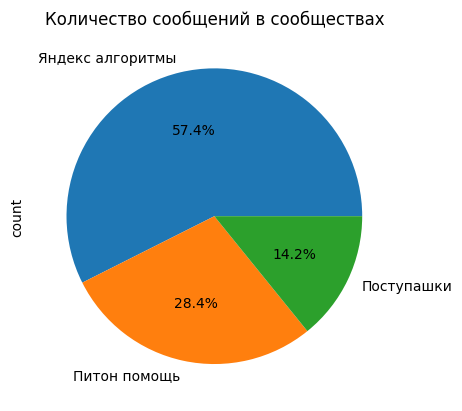

In [166]:
message_df['channel_name'].value_counts().plot(kind='pie', title='Количество сообщений в cообществах',autopct='%1.1f%%')